![CC](https://i.creativecommons.org/l/by/3.0/88x31.png)

This work is licensed under a [Creative Commons Attribution 3.0 International License](http://creativecommons.org/licenses/by/3.0/).

# About this repository
This student thesis project aims to implement a model-based deep reinforcement learning algorithm for controlling the flow past a cylinder. The [drlfoam](https://github.com/OFDataCommittee/drlfoam) repository, which already provides a model-free version is used as a starting point. A complete documentation of the work done in this project can be found in the [report](https://github.com/JanisGeise/robust_MB_DRL_for_flow_control) section of the *Readme* file, as well as the references used (it is also recommended to check out the [references](https://github.com/JanisGeise/robust_MB_DRL_for_flow_control) section of the *Readme* file). The following notebook will give a brief summary of this report as well as an introduction about how to use this repository. In case contents of this notebook are not rendered correctly in Github, e.g. tables, please download and open this notebook locally using *jupyter-lab*. <br><br>
This repository contains the three main directories:
- *drlfoam*:
    - The *drlfoam* repository containes the original version of the drlfoam repository, extended / modyfied for model-based DRL ...still TODO<br><br>
- *test_env_models*:
    - The *test_env_models* directory provides scripts to test different ways of training- and testing environment models on the data generated by the (original) model-free drlfoam. Prior using these scripts, a model-free training needs to be run. Suggestions and advises on how to efficiently run a model-free training in drlfoam will be discussed in [section 3](#MF_training). Once the training data is generated, the *train_environment_model.py* script can be used to test the following configurations:
        - training one (global) environment model for all the training data, without taking the episode into account    
        - training one (global) environment for predicting $c_l$ and $p_i$ and another model for predicting $c_d$. These models are also trained on all the data, despite considering the episode in which the data was generated
        - the same as the two aforementioned options, but this time the environment model (or models) are trained for each new episodes. This means two consecutive episodes are taken for training the models(s), then these model(s) are used to predict the next episode
        - these four options are covering therefore all extrema, namely having either one model performing averagly over all episodes or highly specialized models performing well, but only for the specific episode they are trained for. In reality, one would now make a compromise between these two extrema.
        - an option for training the environment models with low-passed filtered trajectories for $c_d$, this has found to have only little effect on the results
        - options for fine-tuning the models, such as the number of time steps used as input, number of hidden layers, number of neurons and length of the trajectories
        - an option to predict the change of state rather than predicting the next state. This option produces complete unrealistic results for the trajectories of $c_l$ and $p_i$ and is therefore not recommended to use
        - the following table sums up the available options, which can be set in the *setup* dict of the *train_environment_model.py*:
        | option         |                     description                         | default / recommended value |  
        | ---            |                         ---                             |               ---           |  
        | load_path      | path to the training data generated with MF-DRL         | ../drlfoam/examples/test_training/ |  
        | path_to_probes | path to the location of the probe data, this normally should be the same for all cases | base/postProcessing/probes/0/ |  
        | model_dir      | directory where to run the script                       | test_env_models/ |  
        | episode_depending_model | either one global model for whole data set or new model is trained for each episode, based on the previous two episodes | False |  
        | two_env_models | if *True*: one model only for predicting $c_d$, another for $p_i$ and $c_l$, else only one model for all three                   | True  |  
        | print_temp     | print core temperatur of processor as info                                            | False |  
        | normalize      | if *True*: data will be normalized to interval of [1, 0] for training and predictions | True  |  
        | smooth_cd      | flag if $c_d$-trajectories should be filtered after loading (low-pass filter)         | False |  
        | predict_ds     | predict the change of state, not the next state itself                                | False |  
        | n_input_steps  | initial time steps as input for the environment models, need to be $n_t \gt 1$        | 30 |  
        | len_trajectory | trajectory length for training the environment model, this option can be set independently of the trajectory length used in MF-DRL for creating the data. <br>The only prerequisite is, that *len_trajectory* $\%$ *length_trajectory(MF-DRL)* $== 0$                              | 200 |  
        | ratio          | splitting ratio for train-, validation and test data, for episode-wise models. <br>The test data ratio needs to be set to zero since the each next episode is used as test data                                                                                                | (0.65, 0.3, 0.05) <br> (0.65, 0.35, 0.0)|  
        | epochs         | number of epochs to run for the environment model, if *two_env_models* then this refers to the model for $c_l$ and $p_i$        | 10 000 |  
        | n_neurons      | number of neurons per layer for the environment model, if *two_env_models* then this refers to the model for $c_l$ and $p_i$    | 50 |
        | n_layers       | number of hidden layers for the environment model, if *two_env_models* then this refers to the model for $c_l$ and $p_i$        | 3 |  
        | n_neurons_cd   | number of neurons per layer for the environment model for cd (if option is set) | 50 |  
        | n_layers_cd    | number of hidden layers for the environment model for cd (if option is set)     | 5 |  
        | epochs_cd      | number of epochs to run for the environment model for cd (if option is set)     | 10 000 |  
        <br> 
    - Further, within this directory are scripts to post-process and visualize all results and data created, as well as conducting parameter studies with respect to the influence of the model architecture or number of time steps as input.<br> <br> 
- *scripts_py_plots*:
    - this directory provides scripts for post-processing all results generated over the course of the training (MB-DRL as well as MF-DRL)
    - various scripts for conducting parameter studies and visualizing data of these parameter studies, e.g. investigting the influence of the buffer size and trajectory length as shown in [section 3](#MF_training)

# Active flow control and numerical setup
This section briefly discusses the general flow problem to solve and the used numerical setup.

## Flow problem
Comparison of the uncontrolled flow past a cylinder  with the controlled flow, both at a Reynolds number of $Re = 100$:
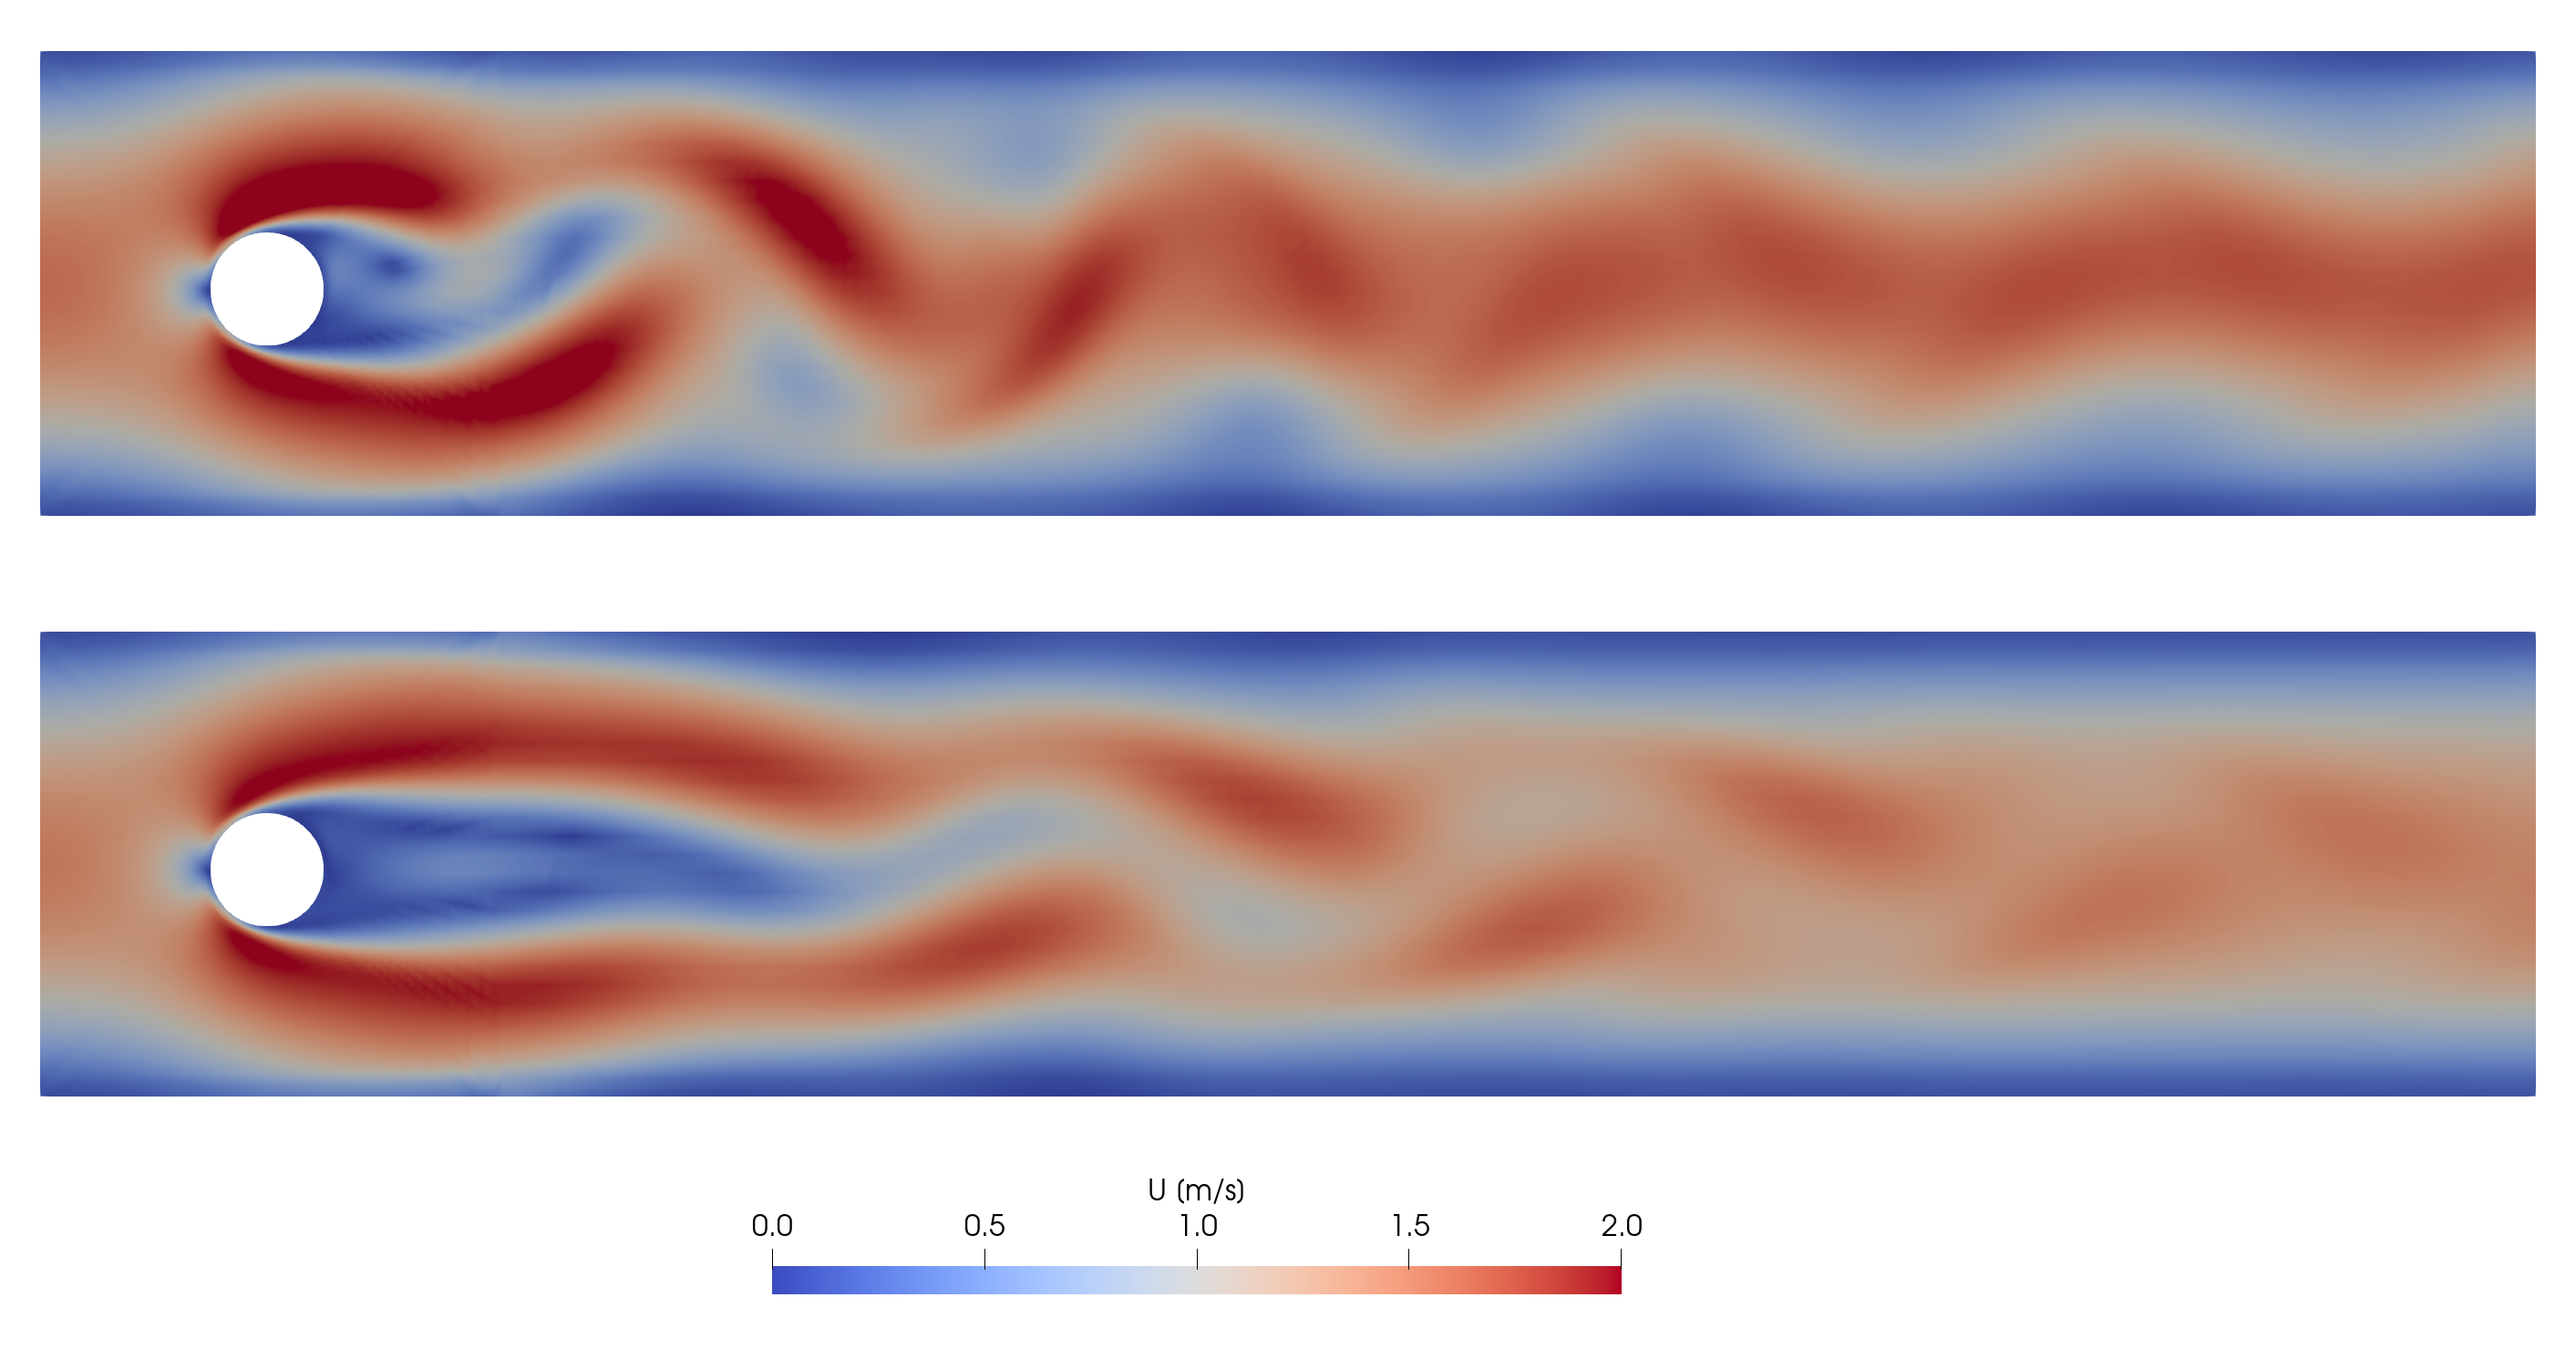


## Numerical setup
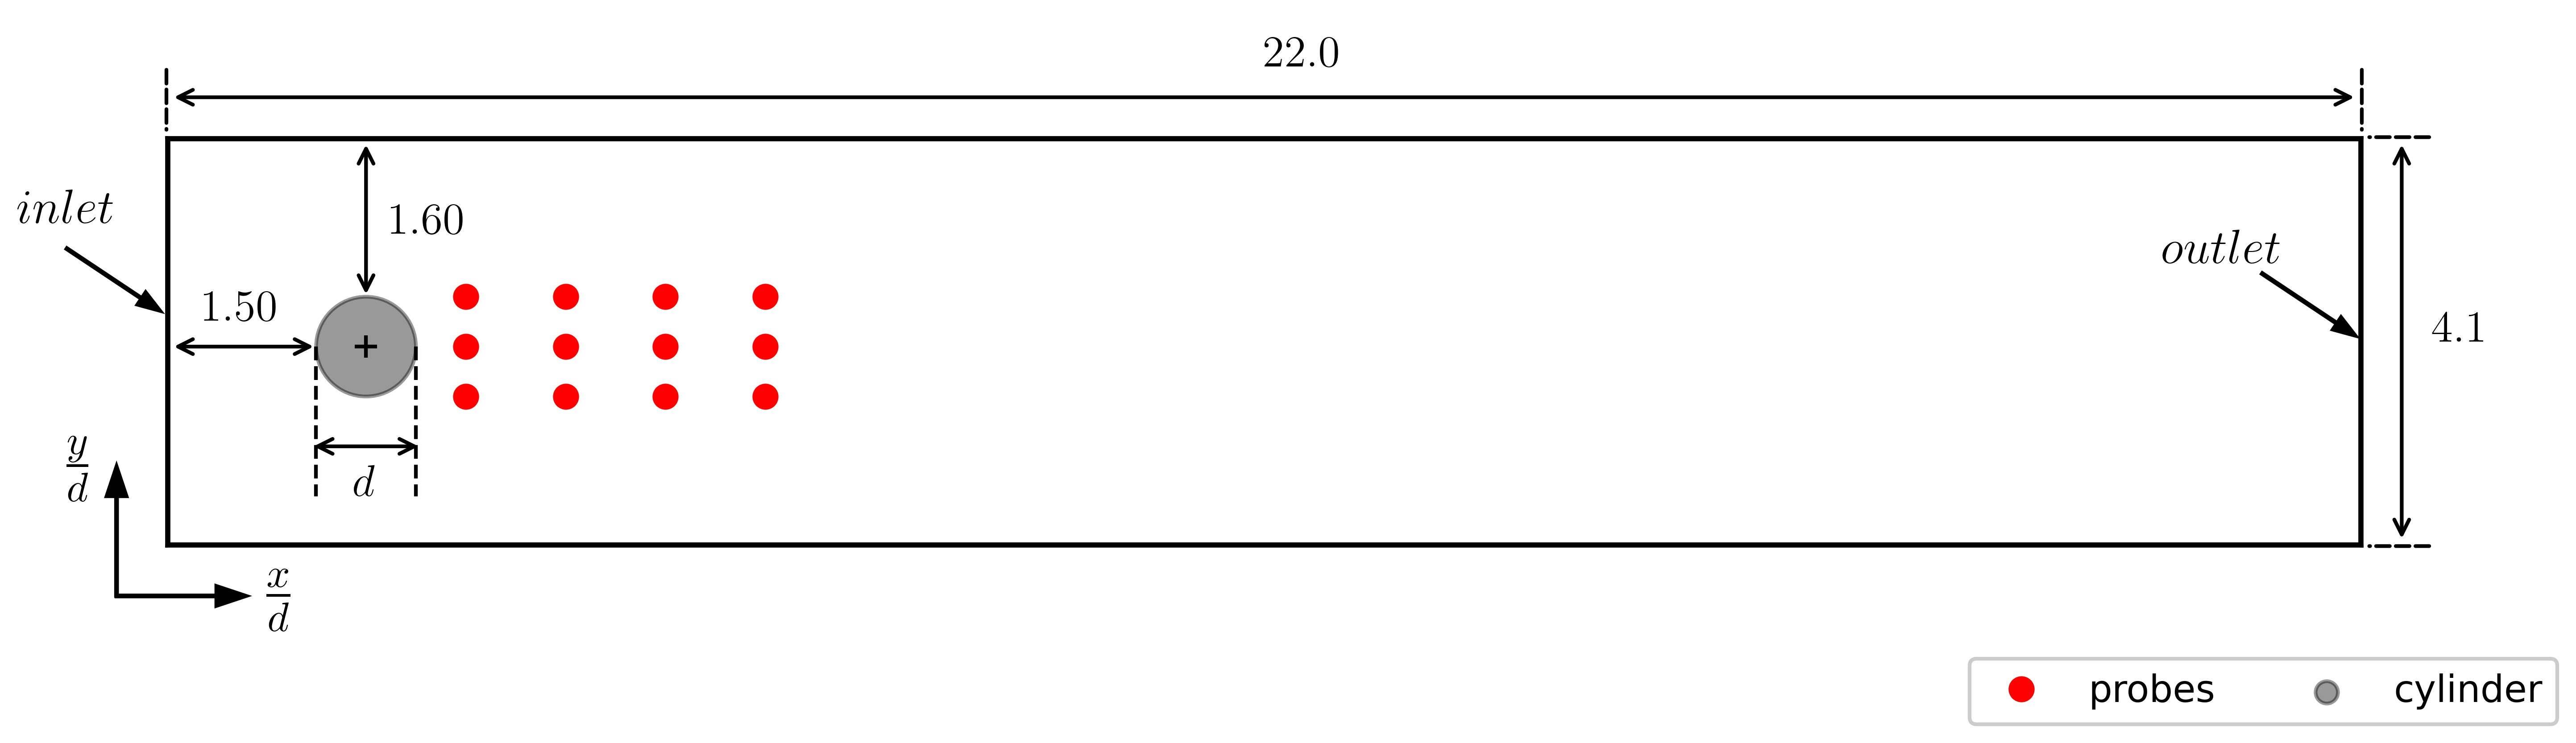
probes = pressure values $p_i$ at the probe location  
$c_l$, $c_d$ are taken at the cylinder surface

# Choosing optimal parameters for a model-free training (MF-DRL) <a id="MF_training"></a>

reward function takes $c_l$ and $c_d$ into account, $c_d$ is weighted more than $c_l$, $r = reward$, $r(c_d, c_l) = 3 - (c_d + 0.1 * | c_l |)$

TODO: add args in drlfoam MB/MF episodes, if set to $0$ then this means no models are used for PPO-training (MF-DRL)

# Running a training using environment models (MB-DRL)